###Demonstrate using the simulator at the region level, deterministic integration, stereo-EEG

In [12]:
from tvb.simulator.lab import *

Perform the simulation

In [13]:
LOG.info("Configuring...")

In [14]:
#Initialise a Model, Coupling, and Connectivity.
sens = sensors.SensorsInternal(load_default=True)

oscillator = models.Generic2dOscillator()
white_matter = connectivity.Connectivity(load_default=True)
white_matter.speed = numpy.array([4.0])
white_matter_coupling = coupling.Linear(a=0.0154)

In [15]:
#Initialise an Integrator
heunint = integrators.HeunDeterministic(dt=2 ** -6)

In [16]:
#Initialise some Monitors with period in physical time
momo = monitors.Raw()
mama = monitors.TemporalAverage(period=2 ** -2)
mon_seeg = monitors.SEEG(sensors=sens, period=2 ** -2)
#Bundle them
what_to_watch = (momo, mama, mon_seeg)

In [17]:
#Initialise a Simulator -- Model, Connectivity, Integrator, and Monitors.
sim = simulator.Simulator(model=oscillator, connectivity=white_matter,
                          coupling=white_matter_coupling,
                          integrator=heunint, monitors=what_to_watch)
sim.configure()

LOG.info("Starting simulation...")

In [18]:
#Call a simulator - Perform the simulation
raw_data = []
raw_time = []
tavg_data = []
tavg_time = []
seeg_data = []
seeg_time = []

for raw, tavg, seeg in sim(simulation_length=2 ** 6):

    if not raw is None:
        raw_time.append(raw[0])
        raw_data.append(raw[1])

    if not tavg is None:
        tavg_time.append(tavg[0])
        tavg_data.append(tavg[1])

    if not seeg is None:
        seeg_time.append(seeg[0])
        seeg_data.append(seeg[1])

LOG.info("Finished simulation.")

####Plot pretty pictures of what we just did 

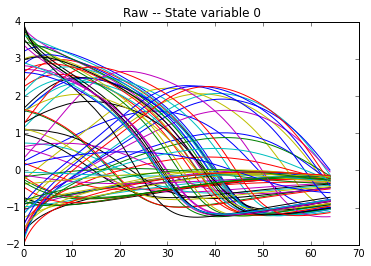

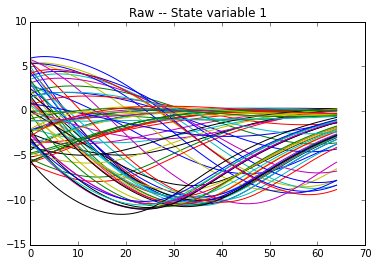

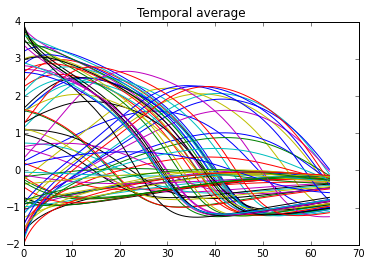

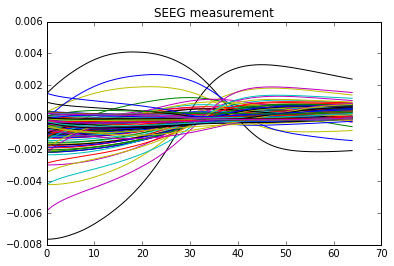

In [19]:
#Plot defaults in a few combinations
#Make the lists numpy.arrays for easier use.
RAW = numpy.array(raw_data)
TAVG = numpy.array(tavg_data)
SEEG = numpy.array(seeg_data)

#Plot raw time series
figure(1)
plot(raw_time, RAW[:, 0, :, 0])
title("Raw -- State variable 0")
figure(2)
plot(raw_time, RAW[:, 1, :, 0])
title("Raw -- State variable 1")

#Plot temporally averaged time series
figure(3)
plot(tavg_time, TAVG[:, 0, :, 0])
title("Temporal average")

#Plot sEEG traces
figure(4)
plot(seeg_time, SEEG[:, 0, :, 0])
title("SEEG measurement")

#Show them
show()